In [1]:
import sys, os
from time import time
if '../' not in sys.path:
    sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from modules.paths import Experiment
from matplotlib.colors import ListedColormap
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
def get_stack_df(stack):
    dfs = []
    for layer in stack:
        if layer.include:
            dfs.append(layer.df)
    df = pd.concat(dfs)
    df = df[df.im_label!=-1]
    df = df[df.near_furrow]
    return df

def show_layer(layer, classifier):
    labels = classifier(layer.df)
    xy = layer.df[['centroid_x', 'centroid_y']].values
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
    _ = layer.get_channel('r').show(segments=False, ax=ax0, cmap=plt.cm.Greys)
    ax1.scatter(*xy.T, c=labels, cmap=classifier.cmap, lw=0)
    ax1.invert_yaxis()
    _ = ax1.axis('off')

In [3]:
tickpad = 0
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.labelpad'] = 0
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.minor.size'] = 1
plt.rcParams['xtick.major.pad'] = tickpad
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.minor.size'] = 1
plt.rcParams['ytick.major.pad'] = tickpad
plt.rcParams['ytick.labelsize'] = 7
plt.rcParams['ytick.direction'] = 'out'

In [4]:
# Load paths to each set of experiments
control_path = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/control/slices/w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A'
mutant_path = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/perturbation/slices/w-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A'
control = Experiment(control_path)
mutant = Experiment(mutant_path)

# Define thresholds on a per-stack basis

In [32]:
stack = mutant[mutant.disc_names.index(42)]
df = get_stack_df(stack)

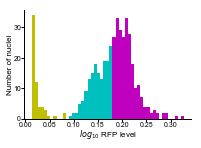

In [30]:
# create cell genotype classifier (operates on cells)
N = 3
gd = {0:0, 1:1, 2:2}
colors = ['y', 'c', 'm'][:3]
cmap = ListedColormap(colors, 'indexed', N=3)
classifier = CellClassifier.from_cells(df, classify_on='r', n=N, log=False, genotype_dict=gd, cmap=cmap)

fig, ax = plt.subplots(figsize=(3, 2))
_ = classifier.show(ax=ax)

#fig.savefig('../graphics/cell_classification.pdf', dpi=300, format='pdf', transparent=True, rasterized=True)

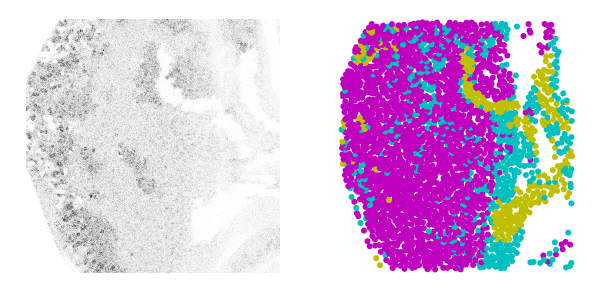

In [31]:
show_layer(stack[3], classifier)

In [391]:
for layer in stack:
    annotate_layer(layer, classifier, plot=True, dpi=100)

# Create cell genotype classifier

In [6]:
# compile all data for defining genotype thresholds
control_df = control.compile_measurements()
mutant_df = mutant.compile_measurements()
overall_df = pd.concat((control_df, mutant_df))
df = overall_df[overall_df.im_label!=-1]
df = df[df.near_furrow]

Text(0,0.5,'Number of nuclei')

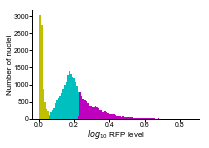

In [54]:
# create cell genotype classifier (operates on cells)
N = 9
genotype_dict = {0:0, 1:1, 2:1, 3: 1, 4: 2, 5:2, 6:2, 7:2, 8:2}
fig, ax = plt.subplots(figsize=(3, 2))
colors = ['y', 'c', 'm', 'k', 'r', 'g'][:3]
cmap = ListedColormap(colors, 'indexed', N=3)
cell_classifier = CellClassifier.from_cells(df, classify_on='r', n=N, log=False, genotype_dict=genotype_dict, cmap=cmap)
#cell_classifier = CellClassifier.from_im_clusters(df, classify_on='r_normalized', n=N, log=True, genotype_dict=genotype_dict, cmap=cmap)
_ = cell_classifier.show(ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('$log_{10}$ RFP level', fontsize=8)
ax.set_ylabel('Number of nuclei', fontsize=8)

In [88]:
# fig, ax = plt.subplots(figsize=(2, 1))
# bins = np.linspace(cell_classifier.x.min(), cell_classifier.x.max(), 100)
# _ = ax.hist(cell_classifier.x, bins=bins)

Text(0,0.5,'Number of nuclei')

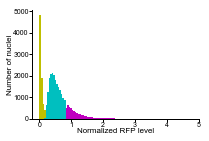

In [9]:
# fig, ax = plt.subplots(figsize=(3, 2))
# cell_classifier._show(10**cell_classifier.x, cell_classifier.labels, ax=ax)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.set_xlabel('Normalized RFP level', fontsize=8)
# ax.set_ylabel('Number of nuclei', fontsize=8)

# apply to all discs

In [24]:
""" ANNOTATE ALL LAYERS """
for experiment in (control, mutant):
    for stack in experiment:
        for layer in stack:
            #if layer.include:
            try:
                annotate_layer(layer, cell_classifier, plot=True, dpi=100)
            except:
                print('FAIL', stack.disc_name, layer.layer_id)
        print('Finished', stack.disc_name)

Finished 28
Finished 29
Finished 30
Finished 31
Finished 55
Finished 56
Finished 6
Finished 7
Finished 15
Finished 16
Finished 17
Finished 19
Finished 20
Finished 24
Finished 25
Finished 26
Finished 34
Finished 35
Finished 36
Finished 42
Finished 43
Finished 44
Finished 46
Finished 47
Finished 48
Finished 49
Finished 50
Finished 51
Finished 52
Finished 53


In [456]:
""" ANNOTATE ALL LAYERS """
for experiment in (control, mutant):
    for stack in experiment:
        for layer in stack:
            try:
                mark_clone_boundaries(layer)
                layer.save_contours()
            except:
                print(stack.disc_name, layer.layer_id)

# Check annotation

In [62]:
disc = mutant[9]
layer = disc[0]
disc.disc_name

'26'

(-83.70572048734462, 2129.6981708125445, 2133.7531919212565, -88.7816831174566)

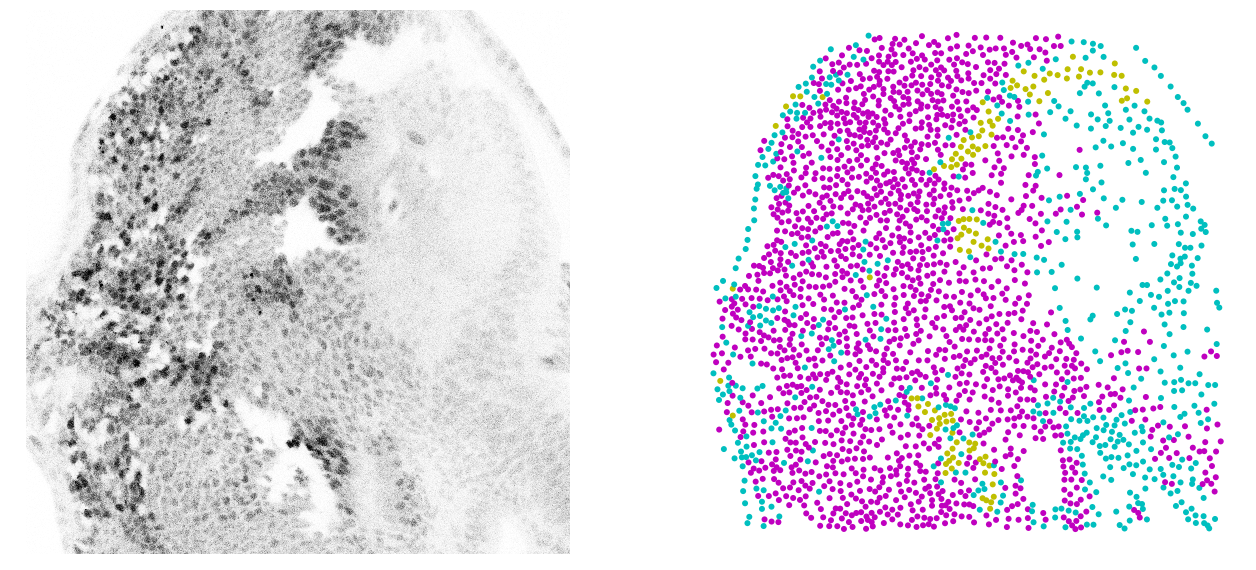

In [59]:
labels = cell_classifier(layer.df)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(22, 10))
xy = layer.df[['centroid_x', 'centroid_y']].values
_ = layer.get_channel('r').show(segments=False, ax=ax0, cmap=plt.cm.Greys)
ax1.scatter(*xy.T, c=labels, cmap=cell_classifier.cmap, lw=0)
ax1.invert_yaxis()
ax1.axis('off')

In [77]:
Counter(labels)

Counter({2: 1259, 1: 1076, 0: 140})

In [18]:
from modules.annotation import CloneMask
from collections import Counter
from modules.io import IO
import gc

def mark_clone_boundaries(layer):
    edges = layer.annotation.graph.edges
    assign_genotype = np.vectorize(dict(layer.df.genotype).get)
    edge_genotypes = assign_genotype(edges)
    boundaries = edge_genotypes[:, 0] != edge_genotypes[:, 1]
    boundary_nodes = np.unique(edges[boundaries])
    layer.df['boundary'] = False
    layer.df.loc[boundary_nodes, 'boundary'] = True

def annotate_layer(layer, cell_classifier, plot=True, dpi=100):
    
    # assign genotype to all cells in layer
    clone_classifier = CloneClassifier.from_layer(layer, cell_classifier)
    layer.df['genotype'] = clone_classifier.genotypes
    layer.df['km_label'] = cell_classifier(layer.df)
    mark_clone_boundaries(layer)
    
    # instantiate IO
    io = IO()
    
    # save updated contours
    contours = layer.df.to_json()
    io.write_json(os.path.join(layer.path, 'contours.json'), contours)
    
    if plot:
        
        # visualize clones for current layer
        fig, ax = plt.subplots(figsize=(10, 10))    
        layer.annotation.clone_mask = CloneMask.from_layer(layer)
        _ = layer.get_channel('r').show(segments=False, ax=ax, cmap=plt.cm.Greys)
        layer.annotation.plot_clones(ax=ax)

        # set image keyword arguments
        im_kw = dict(format='png', dpi=dpi, bbox_inches='tight', pad_inches=0)

        # save figure
        fig.axes[0].axis('off') 
        fig.savefig(os.path.join(layer.path, 'annotation.png'), **im_kw)
        fig.clf()
        plt.close(fig)
        gc.collect()
        
        

    
class CloneClassifier:
    def __init__(self, df, cell_classifier):
        self.im_to_genotype = self.build_classifier(df, cell_classifier)
        self.genotypes = self.__call__(df.im_label.values)
        
    def __call__(self, im_labels):
        return self.im_to_genotype(im_labels)
    
    @staticmethod
    def from_layer(layer, cell_classifier):
        return CloneClassifier(layer.df, cell_classifier)
    
    @classmethod
    def build_classifier(cls, df, cell_classifier):
        classify_im_cluster = lambda x: cls.get_mode(cell_classifier(x))
        im_to_genotype_dict = df.groupby('im_label').apply(classify_im_cluster).to_dict()
        im_to_genotype_dict[-1] = -1
        return np.vectorize(im_to_genotype_dict.get)        
        
    @staticmethod
    def get_mode(x):
        mode, count = Counter(x).most_common(1)[0]
        return mode

from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap, Normalize


class KM:
    
    def __init__(self, values, n=3, log=False, genotype_dict=None, cmap=None):
        self.n = n
        self.x = values
        self.log = log
        self.genotype_dict = genotype_dict
        if self.log:
            self.x = np.log10(self.x)
        
        self.kmeans(n)
        self.build_classifier(genotype_dict=genotype_dict)
        self.set_cmap(cmap)
        self.labels = self.classifier(self.x.reshape(-1, 1))
    
    def __call__(self, x):
        self.classifier(x)
        
    def set_cmap(self, cmap=None):
        if cmap is None:
            cmap = plt.cm.plasma
            norm = Normalize(vmin=0, vmax=self.n)
            colors = [cmap(norm(i)) for i in range(self.n)]
            self.cmap = ListedColormap(colors)
        else:
            self.cmap = cmap
        
    @staticmethod
    def _kmeans(x, n):
        return KMeans(n).fit(x.reshape(-1, 1))
    
    @staticmethod
    def _build_classifier(km):
        """ Create vectorized function for [x] values to genotypes. """
        centroids = km.cluster_centers_.ravel()
        flip = lambda f: f.__class__(map(reversed, f.items()))
        km_to_ordered_dict = flip(dict(enumerate(np.argsort(centroids))))
        km_to_ordered = np.vectorize(km_to_ordered_dict.get)
        classifier = lambda x: km_to_ordered(km.predict(x))
        return classifier
    
    def kmeans(self, n):
        self.n = n
        km = self._kmeans(self.x, n)
        self.km = km
    
    def build_classifier(self, genotype_dict=None):
        
        # map values to sequential clusters
        value_to_cluster = self._build_classifier(self.km)
        
        # map clusters to genotypes
        if genotype_dict is None:
            genotype_dict = {k: k for k in range(self.n)}
        cluster_to_genotype = np.vectorize(genotype_dict.get)
        
        # set classifier
        self.classifier = lambda x: cluster_to_genotype(value_to_cluster(x))
        
    def show(self, **kw):
        self._show(self.x, self.labels, **kw)
            
    def _show(self, x, genotypes, ax=None):
        if ax is None:
            fig, ax = plt.subplots()
        bins = np.linspace(x.min(), x.max(), 50)        
        for genotype in range(self.n):
            xi = x[(genotypes==genotype)]
            ax.hist(xi, bins=bins, facecolor=self.cmap(genotype))
            
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel('$log_{10}$ RFP level', fontsize=8)
        ax.set_ylabel('Number of nuclei', fontsize=8)
        
    
class CellClassifier(KM):
    
    def __init__(self, values, classify_on='r_normalized', **kw):
        self.classify_on = classify_on
        KM.__init__(self, values, **kw)
    
    def __call__(self, df):
        x =  df[self.classify_on].values.reshape(-1, 1)
        if self.log:
            x = np.log10(x)
        return self.classifier(x)
        
    @staticmethod
    def from_cells(df, classify_on='r_normalized', **kw):
        values = df[classify_on].values
        return CellClassifier(values, classify_on, **kw)
    
    @staticmethod
    def from_im_clusters(df, by=None, classify_on='r_normalized', **kw):
        if by is None:
            by = ('disc_genotype', 'disc_id', 'layer', 'im_label')
        values = df.groupby(by=by)[classify_on].mean().values
        return CellClassifier(values, classify_on, **kw)

In [3]:
stack = control[0]
layer = stack[0]

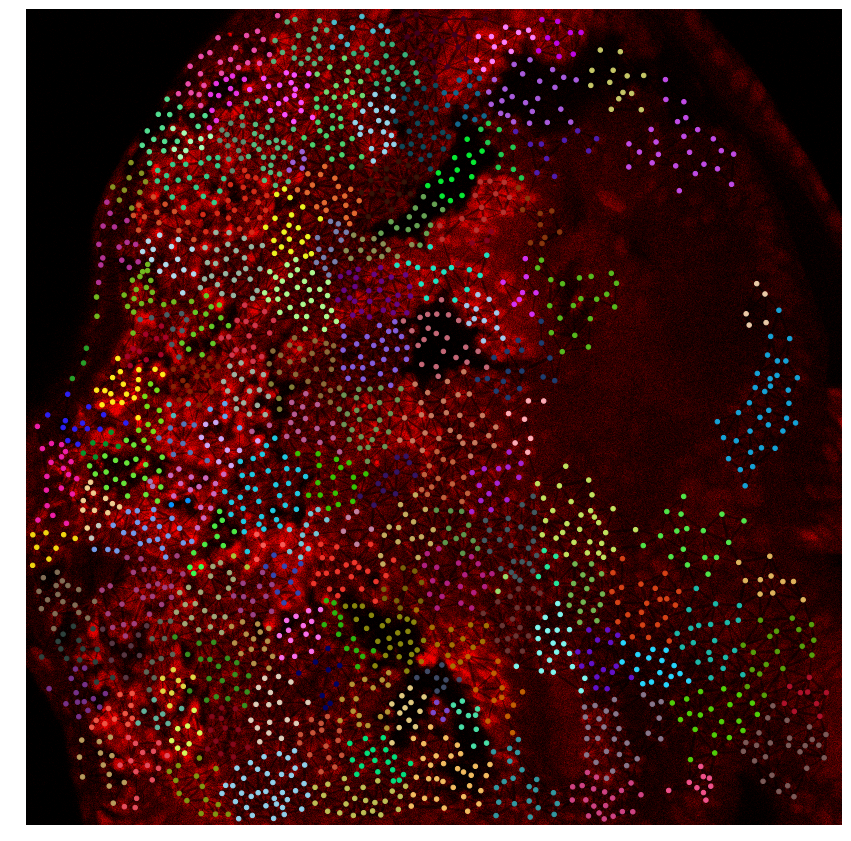

In [22]:
fig = layer.plot_graph()

In [68]:
nx_graph = nxGraph.from_graph(layer.annotation.graph)

[autoreload of modules.graphs failed: Traceback (most recent call last):
  File "/Users/Sebi/.virtualenvs/clones/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/Sebi/.virtualenvs/clones/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/Users/Sebi/.virtualenvs/clones/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/Sebi/.virtualenvs/clones/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_

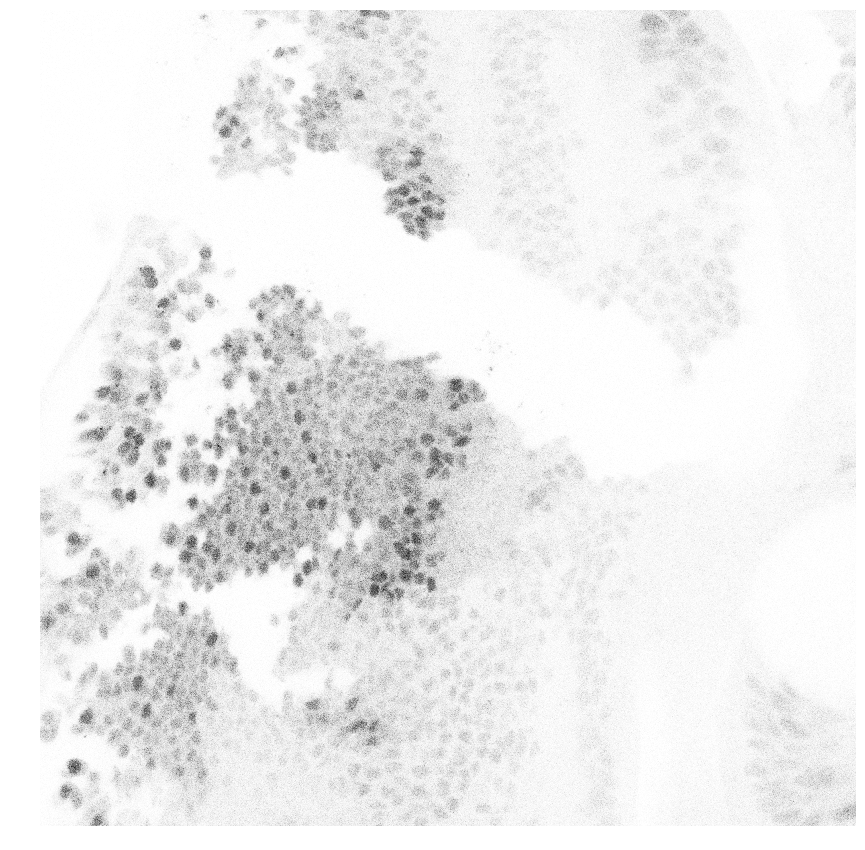

In [72]:
fig, ax = plt.subplots(figsize=(15, 15))
channel = layer.get_channel('r')
fig = channel.show(ax=ax, segments=False, cmap=plt.cm.Greys)
#nx_graph.draw(ax=ax, disconnect=True, edge_alpha=0.5)

In [42]:
layer = stack[3]

In [43]:
from modules.annotation import CloneMask
from collections import Counter
from modules.io import IO
import gc

def mark_clone_boundaries(layer):
    edges = layer.annotation.graph.edges
    assign_genotype = np.vectorize(dict(layer.df.genotype).get)
    edge_genotypes = assign_genotype(edges)
    boundaries = edge_genotypes[:, 0] != edge_genotypes[:, 1]
    boundary_nodes = np.unique(edges[boundaries])
    layer.df['boundary'] = False
    layer.df.loc[boundary_nodes, 'boundary'] = True

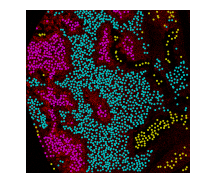

In [59]:
# create axis
fig, ax = plt.subplots(figsize=(3, 3))
_ = layer.get_channel('r').show(ax=ax, segments=False, cmap=None)
_ = ax.axis('off')
cmap = ListedColormap(['y', 'c', 'm'], 'indexed', 3)


fg = layer.df[~layer.df.boundary]
ax.scatter(fg.centroid_x, fg.centroid_y, c=fg.genotype, s=1, cmap=cmap, vmin=0, vmax=3)

fig.savefig('../graphics/boundary_selection.pdf', dpi=300, format='pdf', transparent=True, rasterized=True)